In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [8]:
%matplotlib inline

In [2]:
digits = load_digits()

In [5]:
digits.images.shape

(1797, 8, 8)

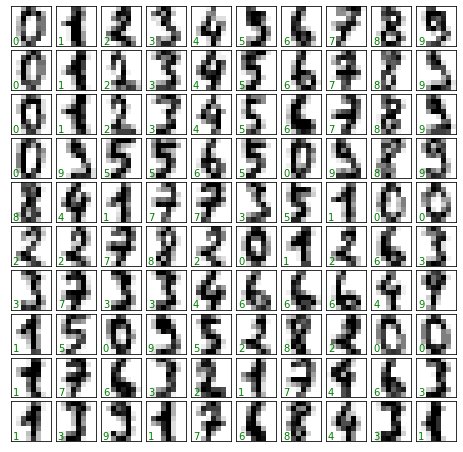

In [10]:
fig, axes = plt.subplots(10, 10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes,
            color='green')

In [11]:
X=digits.data
y=digits.target
print(X.shape)
print(y.shape)

# Her bir rakam 8x8 pixelden oluşuyor.
# Bunu bizim bildiğimiz 2 boyutlu veri seti şeklinde düşünürsek ve
# bu pixelleri düz düşünürsek(veri seti şeklinde yapacağımız için)
# bizim 64 adet özelliğimiz olur.

(1797, 64)
(1797,)


##### Şimdi bunu(yani X'i) görselleştirelim. Fakat böyle yüksek boyutlu veriyi görselleştirmek zordur. Bunun için denetimsiz öğrenme metotlarını kulllanarak veriyi 2 boyuta düşürelim. Burada "Isomap" denen bir "manifold" öğrenme algoritmasını kullanacağız.

In [13]:
from sklearn.manifold import Isomap

In [14]:
iso = Isomap(n_components=2) 
# Yine 2 boyuta düşürelim. (ki grafik çizebilelim)

In [15]:
iso.fit(X)

Isomap()

In [16]:
data2 = iso.transform(X)
data2.shape

(1797, 2)

In [17]:
# 2 boyuta düştüğünü görmekteyiz.

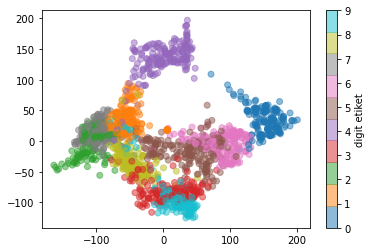

In [19]:
plt.scatter(data2[:,0], data2[:,1], c=digits.target, alpha=0.5,
           cmap=plt.cm.get_cmap('tab10',10))
plt.colorbar(label='digit etiket', ticks=range(10))

##### Grafikten görüldüğü üzere sayıların kolaylıkla ayrılabileceğini görüyoruz. Bu durum basit bir sınıflandırma uygulamasının veriye uygulanabileceğini gösteriyor. "GaussianNB" algoritmasını kullanmak yeterli olacaktır.

In [20]:
from sklearn.model_selection import train_test_split

X_egitim, X_test, y_egitim, y_test = train_test_split(X,y,random_state=0)

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
model_gaussnb = GaussianNB()

In [23]:
model_gaussnb.fit(X_egitim, y_egitim)

GaussianNB()

In [24]:
y_model = model_gaussnb.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.8333333333333334

##### %83 oranında doğru tahmin edebiliyor.

##### Nerede yanlış yaptığımızı görmek için de "Confusion_Matrix" kullanacağız. Bunun için "seaborn" ile grafik çizdirelim.

In [29]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_model)

Text(83.40000000000006, 0.5, 'Gerçek Değer')

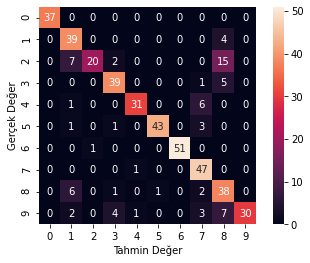

In [32]:
sns.heatmap(mat, square=True, annot=True, cbar=True)
plt.xlabel('Tahmin Değer')
plt.ylabel('Gerçek Değer')

##### Bu grafik yanlış ve doğru yapılan tahminleri gösteriyor. Örneğin 3 için 39 tane doğru tahmin varken 5 tanesini 8 olarak tahmin etmiş.